In [1]:
import os
os.chdir('/home/jovyan/work/src')
import reading
import numpy as np
import math
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [17]:
df = reading.read_lightcurve_vast('../notebooks/data/out03781.dat')

In [18]:
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33406 entries, 0 to 33405
Data columns (total 7 columns):
JD         33406 non-null object
Vrel       33406 non-null float64
err        33406 non-null float64
X          33406 non-null float64
Y          33406 non-null float64
unknown    33406 non-null float64
file       33406 non-null object
dtypes: float64(5), object(2)
memory usage: 1.8+ MB
None


,JD,Vrel,err,X,Y,unknown,file
0,2456888.57060,-11.540650,0.0057,661.19373,763.97290,6.8,../data/wwcra/cleaned/2013-2017/WWCrA#30V_0000...
1,2456495.54858,-11.756736,0.0077,724.22119,672.72961,9.4,../data/wwcra/cleaned/2013-2017/WWCrA#30V_0002...
2,2457621.65912,-12.077028,0.0067,933.08313,615.40002,6.8,../data/wwcra/cleaned/2013-2017/WWCrA#30V_0004...
3,2457246.73545,-11.350990,0.0068,860.61591,725.91461,8.2,../data/wwcra/cleaned/2013-2017/WWCrA#30V_0001...
4,2456852.60434,-11.543407,0.0095,670.30219,698.59662,6.8,../data/wwcra/cleaned/2013-2017/WWCrA#30V_0004...


474.8283999999985 503.5620099998128


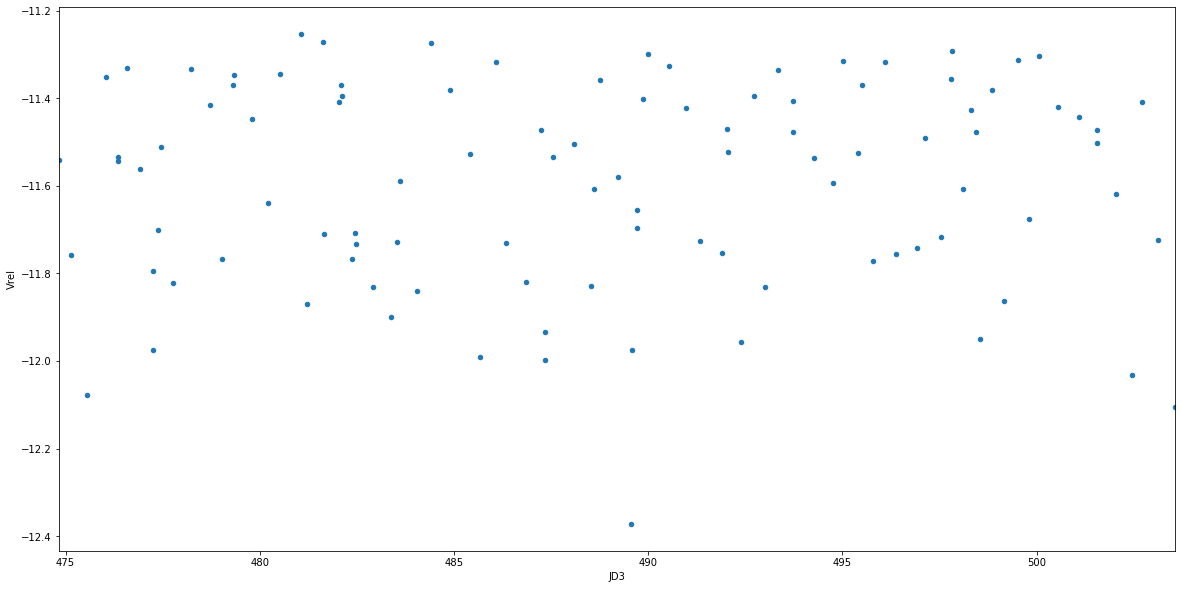

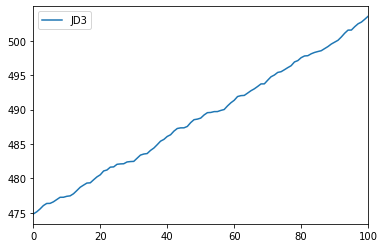

In [19]:
period = 0.55949
df = df.loc[:100]
jds = df['JD'].loc[:1000].astype(float).to_numpy()
jds_norm_orig = np.subtract(jds, jds.min())
jds_norm = np.diff(jds_norm_orig)
jds_norm = np.mod(jds_norm, period)
jds_norm = np.concatenate(([jds_norm_orig[0]],jds_norm))
jds_norm = np.cumsum(jds_norm)
minimum, maximum = np.min(jds_norm),np.max(jds_norm)
print(minimum, maximum)
df['JD3'] = jds_norm
df.plot(x='JD3', y='Vrel', kind='scatter', logx=False, figsize=(20,10), use_index=False, xlim=(minimum, maximum))
df.plot(y='JD3')